In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = 'bank-additional-full.csv'
df = pd.read_csv(file, sep = ';')


In [2]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [16]:
df.head

<bound method NDFrame.head of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mont

In [3]:
df.groupby('y').mean()
# Number of success is very low compared to failures. 36548 = 0 and 4640 = 1
# columns have missing values of unknown or nonexistent values.

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [4]:
#check for missing values 
print(df.info())
df.isnull().any().any()

#No values are missing. No steps were taken to fill missing values. There are however, 'unknown' 
#categories within variables which may need to be addressed later on. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

False

In [5]:
#job marital unknown

#df_unknown_job = df[df.job == 'unknown']
#print(df['job'].value_counts(dropna=False))
#print(df['marital'].value_counts(dropna=False))
#print(df['education'].value_counts(dropna=False))

#print(df_unknown_job)

df = df.rename(columns = {'emp.var.rate':'emp_var_rate', 'cons.price.idx':'cons_price_idx', 
                          'cons.conf.idx':'cons_conf_idx','nr.employed':'nr_employed'})
print(df.info())
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

(41188, 21)

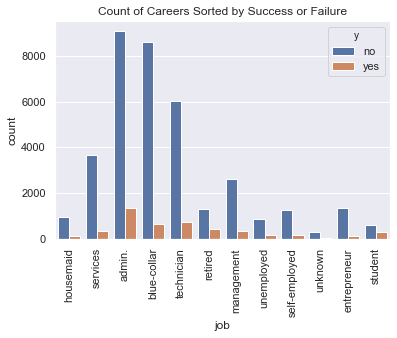

In [7]:
#early data analysis 
ax = sns.countplot(x = 'job', hue = 'y', data = df)
ax.set_title('Count of Careers Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.savefig('careers.png')
plt.show()

Success's and failures seem to not be based on the careers of potential clients. Majority of calls are directed toward middle class employees. Therefore, because there are more calls for these careers, there is greater number of success and failures. 

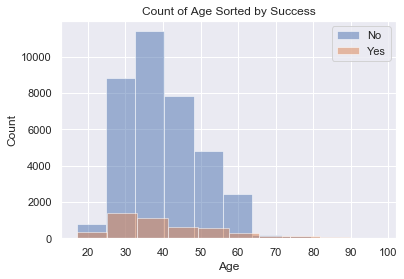

In [6]:
sns.set(style = 'darkgrid')
yes = df[df['y'] == 'yes']
no = df[df['y'] == 'no']
ax = plt.hist(x = 'age', alpha = 0.5, data = no)
ax = plt.hist(x = 'age', alpha = 0.5, data = yes)
ax = plt.title('Count of Age Sorted by Success')
ax = plt.legend(['No', 'Yes'])
ax = plt.xlabel('Age')
ax = plt.ylabel('Count')
plt.savefig('agecount.png')
plt.show()

The data roughly ranges between 20-80. The 30's-40's have high success. 

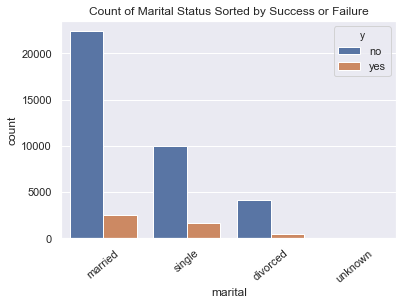

In [9]:
ax = sns.countplot(x = 'marital', hue = 'y', data = df)
ax.set_title('Count of Marital Status Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
plt.show()

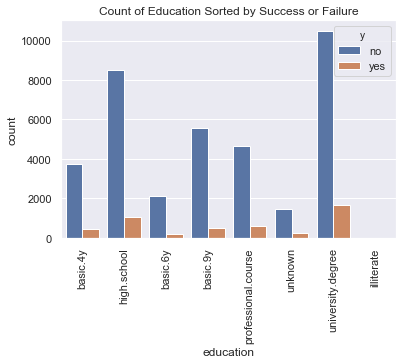

In [10]:
ax = sns.countplot(x = 'education', hue = 'y', data = df)
ax.set_title('Count of Education Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

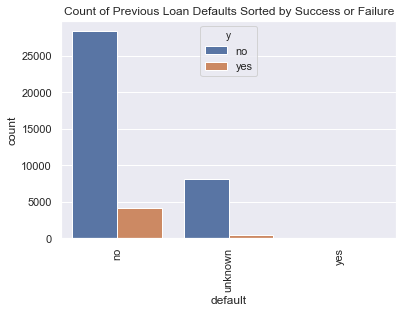

In [11]:
ax = sns.countplot(x = 'default', hue = 'y', data = df)
ax.set_title('Count of Previous Loan Defaults Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

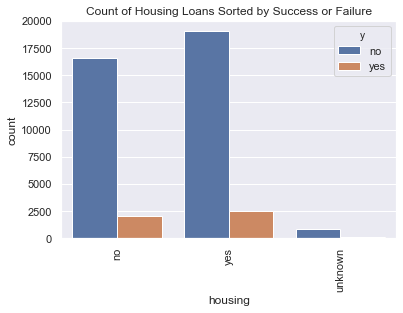

In [12]:
ax = sns.countplot(x = 'housing', hue = 'y', data = df)
ax.set_title('Count of Housing Loans Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

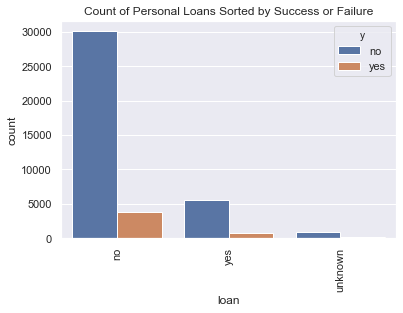

In [13]:
ax = sns.countplot(x = 'loan', hue = 'y', data = df)
ax.set_title('Count of Personal Loans Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

Marital, education, mortgage, previous loans seem to not have a strong indication of whether or not an indiviual will open a term deposit account. 

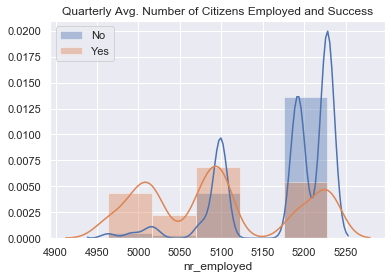

In [20]:
yes = df[df.y == 'yes']
no = df[df.y == 'no']

sns.distplot(no.nr_employed, bins = 5, label = 'No')
sns.distplot(yes.nr_employed, bins = 5, label = 'Yes')
plt.title('Quarterly Avg. Number of Citizens Employed and Success')
plt.legend()
plt.savefig('nremployed.png')
plt.show()

The employment rate seems to have some predictability. As the average number of employed citizens increases, the lower success rate of individuals opening term deposit accounts. The lower the average, the more individuals are willing to open a term deposit account. 

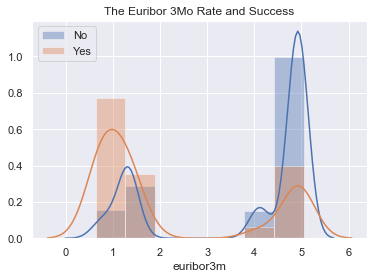

In [19]:
yes = df[df.y == 'yes']
no = df[df.y == 'no']

sns.distplot(no.euribor3m, bins = 7, label = 'No')
sns.distplot(yes.euribor3m, bins = 7, label = 'Yes')
plt.title('The Euribor 3Mo Rate and Success')
plt.legend()
plt.savefig('euribor3m.png')
plt.show()

When the Euribor (3 month average) rate is high it seems that individuals are not opening new accounts while when the rate is lower more individuals are more prone to investing their money. Which goes against the logical thought of investing when interest rates are high, but supports the thought of when unemployment is high more individuals opened term deposit accounts versus when employment was at its highest. 